# ***特征向量表征***

# 1. word embedding

① 上节课我们介绍过表征单词的方式是首先建立一个较大的词汇表（例如10000），然后使用one-hot的方式对每个单词进行编码。
 - 例如，单词Man，Woman，King，Queen，Apple，Orange分别出现在词汇表的第5391，9853，4914，7157，456，6257的位置，则它们分别用O5391，O9853，O4914，O7157，O456，O6257表示。

② 这种one-hot表征单词的方法最大的缺点就是每个单词都是独立的、正交的，无法知道不同单词之间的相似程度。
 - 例如，Apple和Orange都是水果，词性相近，但是单从one-hot编码上来看，内积为零，无法知道二者的相似性。在NLP中，我们更希望能掌握不同单词之间的相似程度。
 
③ 因此，我们可以使用特征表征（Featurized representation）的方法对每个单词进行编码。也就是使用一个特征向量表征单词，特征向量的每个元素都是对该单词某一特征的量化描述，量化范围可以是[-1,1]之间。特征表征的例子如下图所示。

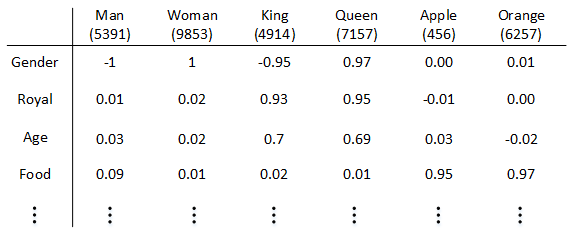

① 特征向量的长度依情况而定，特征元素越多则对单词表征得越全面。这里的特征向量长度设定为300。

② 使用特征表征之后，词汇表中的每个单词都可以使用对应的300 x 1的向量来表示，该向量的每个元素表示该单词对应的某个特征值。

③ 每个单词用e+词汇表索引的方式标记，例如e5391, e9853, e4914, e7157, e456, e6257。

① 这种特征表征的优点是根据特征向量能清晰知道不同单词之间的相似程度，例如Apple和Orange之间的相似度较高，很可能属于同一类别。

② 这种单词“类别”化的方式，大大提高了有限词汇量的泛化能力。

③ 这种特征化单词的操作被称为Word Embeddings，即单词嵌入。

① 值得一提的是，这里特征向量的每个特征元素含义是具体的，对应到实际特征，例如性别、年龄等。

② 而在实际应用中，特征向量很多特征元素并不一定对应到有物理意义的特征，是比较抽象的。

③ 但是，这并不影响对每个单词的有效表征，同样能比较不同单词之间的相似性。

① 每个单词都由高维特征向量表征，为了可视化不同单词之间的相似性，可以使用降维操作，例如t-SNE算法，将300D降到2D平面上。如下图所示。

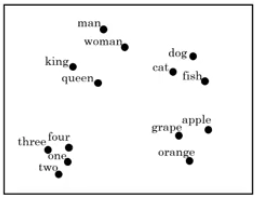

② 从上图可以看出相似的单词分布距离较近，从而也证明了Word Embeddings能有效表征单词的关键特征。

① 之前我们介绍过Named entity识别的例子，每个单词采用的是one-hot编码。

② 下图中，因为“orange farmer”是份职业，很明显“Sally Johnson”是一个人名。

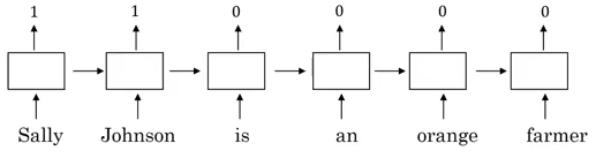

③ 如果采用featurized representation对每个单词进行编码，再构建该RNN模型。

④ 一个新的句子：Robert Lin is an apple farmer。

⑤ 由于这两个句子中，“apple”与“orange”特征向量很接近，很容易能判断出“Robert Lin”也是一个人名。这就是featurized representation的优点之一。

① 可以看出，featurized representation的优点是可以减少训练样本的数目，前提是对海量单词建立特征向量表述（word embedding）。

② 这样，即使训练样本不够多，测试时遇到陌生单词，例如“durian cultivator”，根据之前海量词汇特征向量就判断出“durian”也是一种水果，与“apple”类似，而“cultivator”与“farmer”也很相似。从而得到与“durian cultivator”对应的应该也是一个人名。

③ 这种做法将单词用不同的特征来表示，即使是训练样本中没有的单词，也可以根据word embedding的结果得到与其词性相近的单词，从而得到与该单词相近的结果，有效减少了训练样本的数量。

① featurized representation的特性使得很多NLP任务能方便地进行迁移学习，方法是：

 - 从海量词汇库中学习word embeddings，即所有单词的特征向量。或者从网上下载预训练好的word embeddings。

 - 使用较少的训练样本，将word embeddings迁移到新的任务中。

 - （可选）：继续使用新数据微调word embeddings。

② 建议仅当训练样本足够大的时候，再进行上述第三步。

① 有趣的是，word embeddings与人脸识别与神经风格迁移中介绍的人脸特征编码有很多相似性。

② 人脸图片经过Siamese网络，得到其特征向量f(x)，这点跟word embedding是类似的。

③ 二者不同的是Siamese网络输入的人脸图片可以是数据库之外的；而word embedding一般都是已建立的词汇库中的单词，非词汇库单词统一用< UNK >表示。

① Word embeddings可以帮助我们找到不同单词之间的相似类别关系，如下图所示。

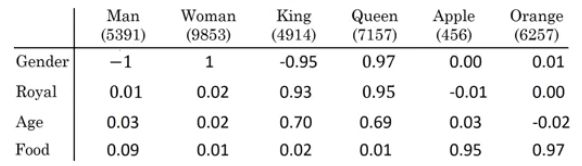

② 上例中，特征维度是4维的，分别是[Gender, Royal, Age, Food]。

③ 常识地，“Man”与“Woman”的关系类比于“King”与“Queen”的关系。而利用Word embeddings可以找到这样的对应类比关系。

① 我们将“Man”的embedding vector与“Woman”的embedding vector相减：

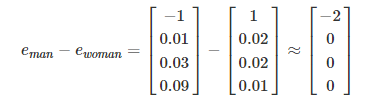

② 类似地，我们将“King”的embedding vector与“Queen”的embedding vector相减：

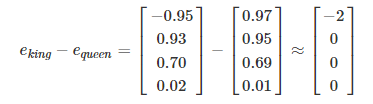

③ 相减结果表明，“Man”与“Woman”的主要区别是性别，“King”与“Queen”也是一样。

④ 一般地，A类比于B相当于C类比于“？”，这类问题可以使用embedding vector进行运算。

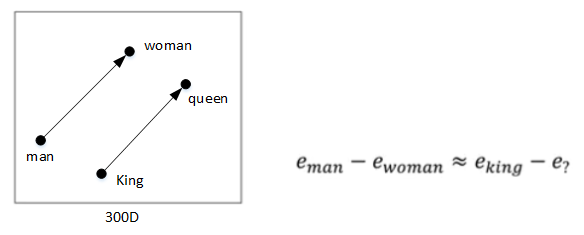

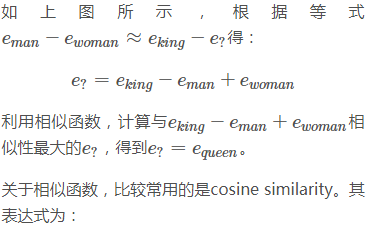

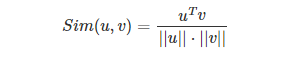

⑤ 还可以计算Euclidian distance来比较相似性，即||u−v||^2。距离越大，相似性越小。

① 假设某个词汇库包含了10000个单词，每个单词包含的特征维度为300，那么表征所有单词的embedding matrix维度为300 x 10000，用E来表示。

② 某单词w的one-hot向量表示为Ow，维度为10000 x 1，则该单词的embedding vector表达式为：

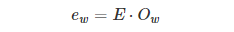

③ 因此，只要知道了embedding matrix E，就能计算出所有单词的embedding vector ew。后面我们将重点介绍如何求出E。

④ 值得一提的是，上述这种矩阵乘积运算$E ⋅ O_{w}$效率并不高，矩阵维度很大，且$O_{w}$大部分元素为零。通常做法是直接从E中选取第w列作为$e_{w}$即可。

① embedding matrix E可以通过构建自然语言模型，运用梯度下降算法得到。

② 举个简单的例子，输入样本是下面这句话：
 
 - I want a glass of orange (juice).
 
③ 通过这句话的前6个单词，预测最后的单词“juice”。

④ E未知待求，每个单词可用embedding vector ew表示。

⑤ 构建的神经网络模型结构如下图所示：

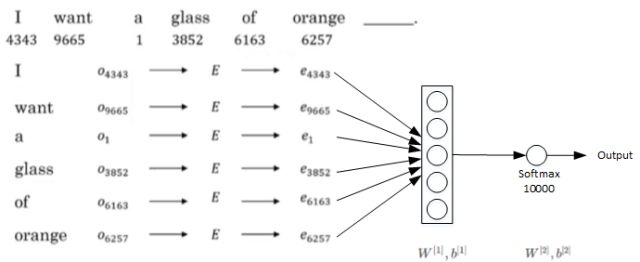

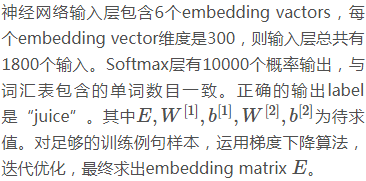

⑥ 这种算法的效果还不错，能够保证具有相似属性单词的embedding vector相近。

⑦ 为了让神经网络输入层数目固定，可以选择只取预测单词的前4个单词作为输入，例如该句中只选择“a glass of orange”四个单词作为输入。当然，这里的4是超参数，可调。

⑧ 一般地，我们把输入叫做context，输出叫做target。对应到上面这句话里：

 - context: a glass of orange

 - target: juice

 - 关于context的选择有多种方法：

 - target前n个单词或后n个单词，n可调

 - target前1个单词

 - target附近某1个单词（Skip-Gram）
 
⑨ 事实证明，不同的context选择方法都能计算出较准确的embedding matrix E。

# 2. Skip-Gram

① 上一小节我们介绍了context和target的选择方法，比较流行的是采用Skip-Gram模型。

② Skip-Gram模型是Word2Vec的一种，Word2Vec的另外一种模型是CBOW（Continuous Bag of Words）。关于CBOW此处不再赘述。

① 以下面这句话为例：

- I want a glass of orange juice to go along with my cereal.

② Skip-Gram模型的做法是：首先随机选择一个单词作为context，例如“orange”；然后使用一个宽度为5或10（自定义）的滑动窗，在context附近选择一个单词作为target，可以是“juice”、“glass”、“my”等等。

③ 最终得到了多个context—target对作为监督式学习样本。

① 训练的过程是构建自然语言模型，经过softmax单元的输出为：

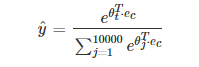

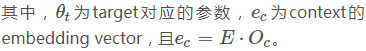

② 相应的loss function为：

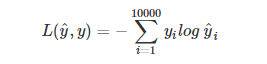

③ 然后，运用梯度下降算法，迭代优化，最终得到embedding matrix E。

④ 然而，这种算法计算量大，影响运算速度。主要因为softmax输出单元为10000个，y^计算公式中包含了大量的求和运算。

⑤ 解决的办法之一是使用hierarchical softmax classifier，即树形分类器。其结构如下图所示：

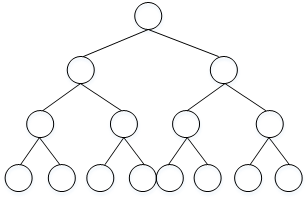

① 这种树形分类器是一种二分类。与之前的softmax分类器不同，它在每个数节点上对目标单词进行区间判断，最终定位到目标单词。

② 这好比是猜数字游戏，数字范围0～100。我们可以先猜50，如果分类器给出目标数字比50大，则继续猜75，以此类推，每次从数据区间中部开始。

③ 这种树形分类器最多需要log N步就能找到目标单词，N为单词总数。

④ 实际应用中，对树形分类器做了一些改进。改进后的树形分类器是非对称的，通常选择把比较常用的单词放在树的顶层，而把不常用的单词放在树的底层。这样更能提高搜索速度。

① 最后提一点，关于context的采样，需要注意的是如果使用均匀采样，那么一些常用的介词、冠词，例如the, of, a, and, to等出现的概率更大一些。

② 但是，这些单词的embedding vectors通常不是我们最关心的，我们更关心例如orange, apple， juice等这些名词等。

③ 所以，实际应用中，一般不选择随机均匀采样的方式来选择context，而是使用其它算法来处理这类问题。

# 3. Negative Sampling

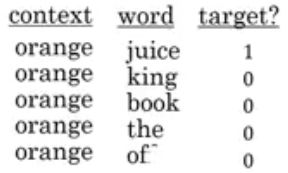

① Negative sampling是另外一种有效的求解embedding matrix E的方法。

② 它的做法是判断选取的context word和target word是否构成一组正确的context-target对，一般包含一个正样本和k个负样本。

③ 例如，“orange”为context word，“juice”为target word，很明显“orange juice”是一组context-target对，为正样本，相应的target label为1。若“orange”为context word不变，target word随机选择“king”、“book”、“the”或者“of”等，这些都不是正确的context-target对，为负样本，相应的target label为0。

④ 一般地，固定某个context word对应的负样本个数k一般遵循：

 - 若训练样本较小，k一般选择5～20；

 - 若训练样本较大，k一般选择2～5即可。

① Negative sampling的数学模型为：

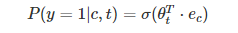

② 其中，σ表示sigmoid激活函数。

① 很明显，negative sampling某个固定的正样本对应k个负样本，即模型总共包含了k+1个binary classification。

② 对比之前介绍的10000个输出单元的softmax分类，negative sampling转化为k+1个二分类问题，计算量要小很多，大大提高了模型运算速度。

① 最后提一点，关于如何选择负样本对应的target单词，可以使用随机选择的方法。

② 但有资料提出一个更实用、效果更好的方法，就是根据该词出现的频率进行选择，相应的概率公式为：

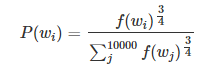

③ 其中，f(wi)表示单词wi在单词表中出现的概率。

# 4. GloVe Word Vectors

① GloVe算法引入了一个新的参数：

 - Xij: 表示i出现在j之前的次数，即i和j同时出现的次数。
 - 其中，i表示context，j表示target。

② 一般地，如果不限定context一定在target的前面，则有对称关系Xij=Xji；如果有限定先后，则Xij≠Xji。

③ 接下来的讨论中，我们默认存在对称关系Xij=Xji。

① GloVe模型的loss function为：

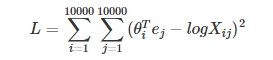

② 从上式可以看出，若两个词的embedding vector越相近，同时出现的次数越多，则对应的loss越小。

③ 为了防止出现“log 0”，即两个单词不会同时出现，无相关性的情况，对loss function引入一个权重因子f(Xij)：

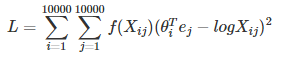

④ 当Xij=0时，权重因子f(Xij)=0。这种做法直接忽略了无任何相关性的context和target，只考虑Xij>0的情况。

⑤ 出现频率较大的单词相应的权重因子f(Xij)较大，出现频率较小的单词相应的权重因子f(Xij)较小一些。

⑥ 具体的权重因子f(Xij)选取方法可查阅相关论文资料。

① 一般地，引入偏移量，则loss function表达式为：

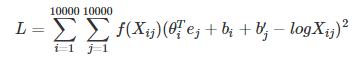

② 值得注意的是，参数θi和ej是对称的。

③ 使用优化算法得到所有参数之后，最终的ew可表示为：

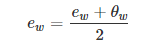

③ 最后提一点的是，无论使用Skip-Gram模型还是GloVe模型等等，计算得到的embedding matrix E的每一个特征值不一定对应有实际物理意义的特征值，如gender，age等。

# 5. Sentiment Classification

① 情感分类一般是根据一句话来判断其喜爱程度，例如1～5星分布，如下图所示。

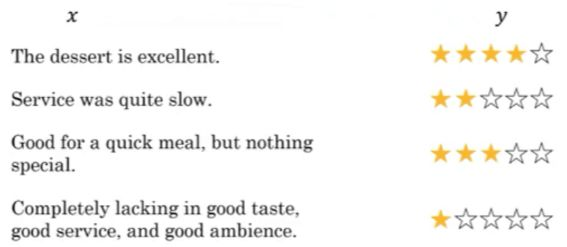

② 情感分类问题的一个主要挑战是缺少足够多的训练样本。

③ 而Word embedding恰恰可以帮助解决训练样本不足的问题。

① 首先介绍使用word embedding解决情感分类问题的一个简单模型算法。

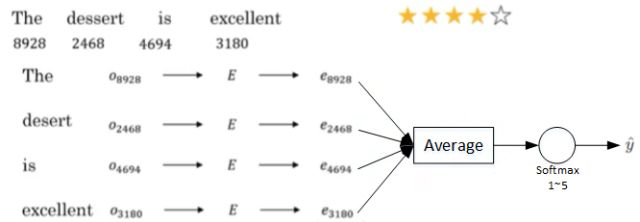

② 如上图所示，这句话的4个单词分别用embedding vector表示。

③ e8928, e2468, e4694, e3180计算均值，这样得到的平均向量的维度仍是300。

④ 最后经过softmax输出1～5星。

① 这种模型结构简单，计算量不大，不论句子长度多长，都使用平均的方式得到300D的embedding vector。该模型实际表现较好。

② 但是，这种简单模型的缺点是使用平均方法，没有考虑句子中单词出现的次序，忽略其位置信息。而有时候，不同单词出现的次序直接决定了句意，即情感分类的结果。例如下面这句话：

 - Completely lacking in good taste, good service, and good ambience.
 
③ 虽然这句话中包含了3个“good”，但是其前面出现了“lacking”，很明显这句话句意是negative的。如果使用上面介绍的平均算法，则很可能会错误识别为positive的，因为忽略了单词出现的次序。

① 为了解决这一问题，情感分类的另一种模型是RNN。

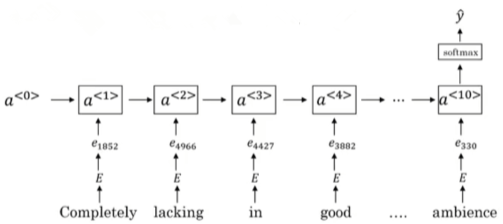

② 该RNN模型是典型的many-to-one模型，考虑单词出现的次序，能够有效识别句子表达的真实情感。

③ 值得一提的是使用word embedding，能够有效提高模型的泛化能力，即使训练样本不多，也能保证模型有不错的性能。

# 6. Debiasing Word Embeddings

① Word embeddings中存在一些性别、宗教、种族等偏见或者歧视，例如下面这两句话：

 - Man: Woman as King: Queen

 - Man: Computer programmer as Woman: Homemaker

 - Father: Doctor as Mother: Nurse

② 很明显，第二句话和第三句话存在性别偏见，因为Woman和Mother也可以是Computer programmer和Doctor。

③ 以性别偏见为例，我们来探讨下如何消除word embeddings中偏见。

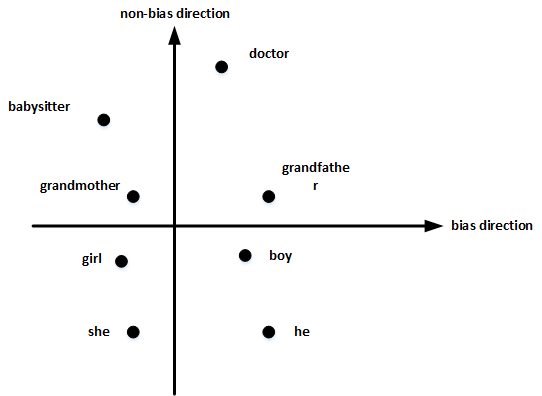

① 首先，确定偏见bias的方向。方法是对所有性别对立的单词求差值，再平均。上图展示了bias direction和non-bias direction。

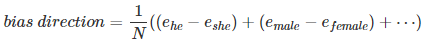

② 然后，单词中立化（Neutralize）。将需要消除性别偏见的单词投影到non-bias direction上去，消除bias维度，例如babysitter，doctor等。

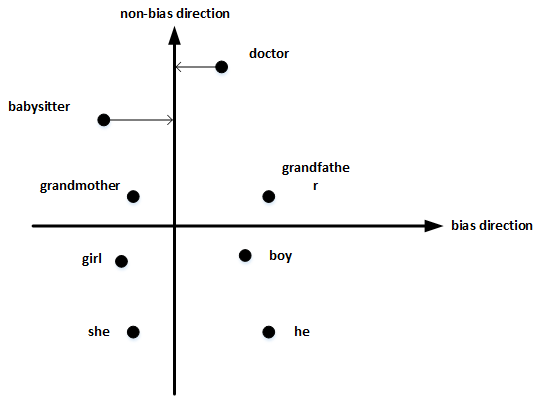

③ 最后，均衡对（Equalize pairs）。让性别对立单词与上面的中立词距离相等，具有同样的相似度。例如让grandmother和grandfather与babysitter的距离同一化。

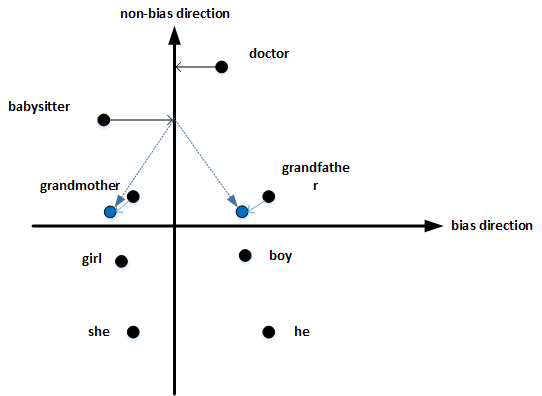

④ 值得注意的是，掌握哪些单词需要中立化非常重要。一般来说，大部分英文单词，例如职业、身份等都需要中立化，消除embedding vector中性别这一维度的影响。